# Import libraries 

In [30]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg

plt.style.use('seaborn-darkgrid')

In [31]:
JobsDF = pd.read_csv('COVID_Jobs_Merged.csv', index_col = 0)
JobsDF.head()

,State,cases,deaths,All Occupations 2018,Computer Mathematical Scientists 2018,Computer Mathematical Scientists 2018 (Percent),Engineers 2018,Engineers 2018 (Percent),Life Scientists 2018,Life Scientists 2018 (Percent),Physical Scientists 2018,Physical Scientists 2018 (Percent),Science Engineer Workers 2018,Science Engineer Workers 2018 (Percent),Social Scientists 2018,Social Scientists 2018 (Percent),Technical Workers 2018,Technical Workers 2018 (Percent)
0,Alabama,387786,14345,1943760.0,34810.0,1.790859,32340.0,1.663786,3180.0,0.163600,2780.0,NaN,69821.428571,3.727577,3195.000000,0.170005,25768.461538,1.377782
1,Alaska,18316,367,315250.0,4820.0,1.528945,5060.0,1.605075,1830.0,0.580492,1670.0,NaN,14480.000000,4.593180,1090.000000,0.345757,6370.000000,2.020619
2,Arizona,426614,18857,2789520.0,92170.0,3.304153,35180.0,1.261149,4480.0,0.160601,4174.0,NaN,114216.428571,4.532470,7870.000000,0.282127,40286.923077,1.608712
3,Arkansas,161569,3301,1210120.0,21960.0,1.814696,8190.0,0.676792,2210.0,0.182627,1462.0,NaN,35500.000000,2.933593,2426.923077,0.209530,11790.000000,0.974284
4,California,2664110,102387,17007690.0,592510.0,3.483777,243550.0,1.431999,63800.0,0.375124,39360.0,NaN,989560.000000,5.818309,50350.000000,0.296043,266500.000000,1.566938


In [32]:
JobsDF.drop([col for col in JobsDF.columns if '(Percent)' in col], axis = 1, inplace = True)
JobsDF = JobsDF.drop(columns = ['cases', 'deaths'])
JobsDF.head()

,State,All Occupations 2018,Computer Mathematical Scientists 2018,Engineers 2018,Life Scientists 2018,Physical Scientists 2018,Science Engineer Workers 2018,Social Scientists 2018,Technical Workers 2018
0,Alabama,1943760.0,34810.0,32340.0,3180.0,2780.0,69821.428571,3195.000000,25768.461538
1,Alaska,315250.0,4820.0,5060.0,1830.0,1670.0,14480.000000,1090.000000,6370.000000
2,Arizona,2789520.0,92170.0,35180.0,4480.0,4174.0,114216.428571,7870.000000,40286.923077
3,Arkansas,1210120.0,21960.0,8190.0,2210.0,1462.0,35500.000000,2426.923077,11790.000000
4,California,17007690.0,592510.0,243550.0,63800.0,39360.0,989560.000000,50350.000000,266500.000000


In [33]:
JobsDF = JobsDF.round({'Science Engineer Workers 2018':1,
                      'Social Scientists 2018':1,
                      'Technical Workers 2018':1})
JobsDF.head()

,State,All Occupations 2018,Computer Mathematical Scientists 2018,Engineers 2018,Life Scientists 2018,Physical Scientists 2018,Science Engineer Workers 2018,Social Scientists 2018,Technical Workers 2018
0,Alabama,1943760.0,34810.0,32340.0,3180.0,2780.0,69821.4,3195.0,25768.5
1,Alaska,315250.0,4820.0,5060.0,1830.0,1670.0,14480.0,1090.0,6370.0
2,Arizona,2789520.0,92170.0,35180.0,4480.0,4174.0,114216.4,7870.0,40286.9
3,Arkansas,1210120.0,21960.0,8190.0,2210.0,1462.0,35500.0,2426.9,11790.0
4,California,17007690.0,592510.0,243550.0,63800.0,39360.0,989560.0,50350.0,266500.0


In [34]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [35]:
JobsDF = pd.merge(JobsDF, COVID_Case, how = 'left', on = 'State')
JobsDF.head()

,State,All Occupations 2018,Computer Mathematical Scientists 2018,Engineers 2018,Life Scientists 2018,Physical Scientists 2018,Science Engineer Workers 2018,Social Scientists 2018,Technical Workers 2018,cases,deaths
0,Alabama,1943760.0,34810.0,32340.0,3180.0,2780.0,69821.4,3195.0,25768.5,26912,785
1,Alaska,315250.0,4820.0,5060.0,1830.0,1670.0,14480.0,1090.0,6370.0,751,10
2,Arizona,2789520.0,92170.0,35180.0,4480.0,4174.0,114216.4,7870.0,40286.9,39298,1228
3,Arkansas,1210120.0,21960.0,8190.0,2210.0,1462.0,35500.0,2426.9,11790.0,13191,188
4,California,17007690.0,592510.0,243550.0,63800.0,39360.0,989560.0,50350.0,266500.0,159098,5202


In [36]:
JobsDF.shape

(51, 11)

In [37]:
JobsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  51 non-null     object 
 1   All Occupations 2018                   51 non-null     float64
 2   Computer Mathematical Scientists 2018  51 non-null     float64
 3   Engineers 2018                         51 non-null     float64
 4   Life Scientists 2018                   51 non-null     float64
 5   Physical Scientists 2018               51 non-null     float64
 6   Science Engineer Workers 2018          51 non-null     float64
 7   Social Scientists 2018                 51 non-null     float64
 8   Technical Workers 2018                 51 non-null     float64
 9   cases                                  51 non-null     int64  
 10  deaths                                 51 non-null     int64  
dtypes: float

In [38]:
JobsDF.isnull().sum()

State                                    0
All Occupations 2018                     0
Computer Mathematical Scientists 2018    0
Engineers 2018                           0
Life Scientists 2018                     0
Physical Scientists 2018                 0
Science Engineer Workers 2018            0
Social Scientists 2018                   0
Technical Workers 2018                   0
cases                                    0
deaths                                   0
dtype: int64

In [39]:
JobsDF.describe()

,All Occupations 2018,Computer Mathematical Scientists 2018,Engineers 2018,Life Scientists 2018,Physical Scientists 2018,Science Engineer Workers 2018,Social Scientists 2018,Technical Workers 2018,cases,deaths
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2.837908e+06,82681.568627,35122.724868,7130.301839,5943.212397,136673.990196,7868.011765,37648.901961,41994.235294,2290.549020
std,3.172568e+06,103969.632785,42747.733421,9733.320561,6837.663785,169576.763902,9402.918079,44530.806521,63513.183767,4748.588326
min,2.693200e+05,2990.000000,2720.000000,810.000000,720.000000,8440.000000,760.000000,3700.000000,614.000000,10.000000
25%,7.092550e+05,15700.000000,7895.000000,2070.000000,1670.000000,31460.000000,1935.000000,10775.000000,9231.500000,212.000000
50%,1.889870e+06,41310.000000,27090.000000,3180.000000,3370.000000,74030.000000,3910.000000,23580.000000,20152.000000,704.000000
75%,3.415255e+06,128400.000000,45345.000000,8710.000000,9361.875000,210975.000000,9440.000000,51040.000000,46961.500000,2469.500000
max,1.700769e+07,592510.000000,243550.000000,63800.000000,39360.000000,989560.000000,50350.000000,266500.000000,389349.000000,30683.000000


In [40]:
corr = JobsDF.corr()
corr

,All Occupations 2018,Computer Mathematical Scientists 2018,Engineers 2018,Life Scientists 2018,Physical Scientists 2018,Science Engineer Workers 2018,Social Scientists 2018,Technical Workers 2018,cases,deaths
All Occupations 2018,1.000000,0.966959,0.940784,0.888921,0.949921,0.967431,0.904331,0.977884,0.698303,0.495868
Computer Mathematical Scientists 2018,0.966959,1.000000,0.946154,0.932778,0.972427,0.995190,0.930739,0.982532,0.657838,0.447756
Engineers 2018,0.940784,0.946154,1.000000,0.898570,0.947611,0.967955,0.848398,0.969511,0.558260,0.361266
Life Scientists 2018,0.888921,0.932778,0.898570,1.000000,0.942462,0.943168,0.890960,0.946285,0.607718,0.421941
Physical Scientists 2018,0.949921,0.972427,0.947611,0.942462,1.000000,0.978906,0.905378,0.975110,0.651748,0.454318
Science Engineer Workers 2018,0.967431,0.995190,0.967955,0.943168,0.978906,1.000000,0.927264,0.988795,0.647506,0.441850
Social Scientists 2018,0.904331,0.930739,0.848398,0.890960,0.905378,0.927264,1.000000,0.907602,0.775063,0.610863
Technical Workers 2018,0.977884,0.982532,0.969511,0.946285,0.975110,0.988795,0.907602,1.000000,0.630825,0.418852
cases,0.698303,0.657838,0.558260,0.607718,0.651748,0.647506,0.775063,0.630825,1.000000,0.957358
deaths,0.495868,0.447756,0.361266,0.421941,0.454318,0.441850,0.610863,0.418852,0.957358,1.000000


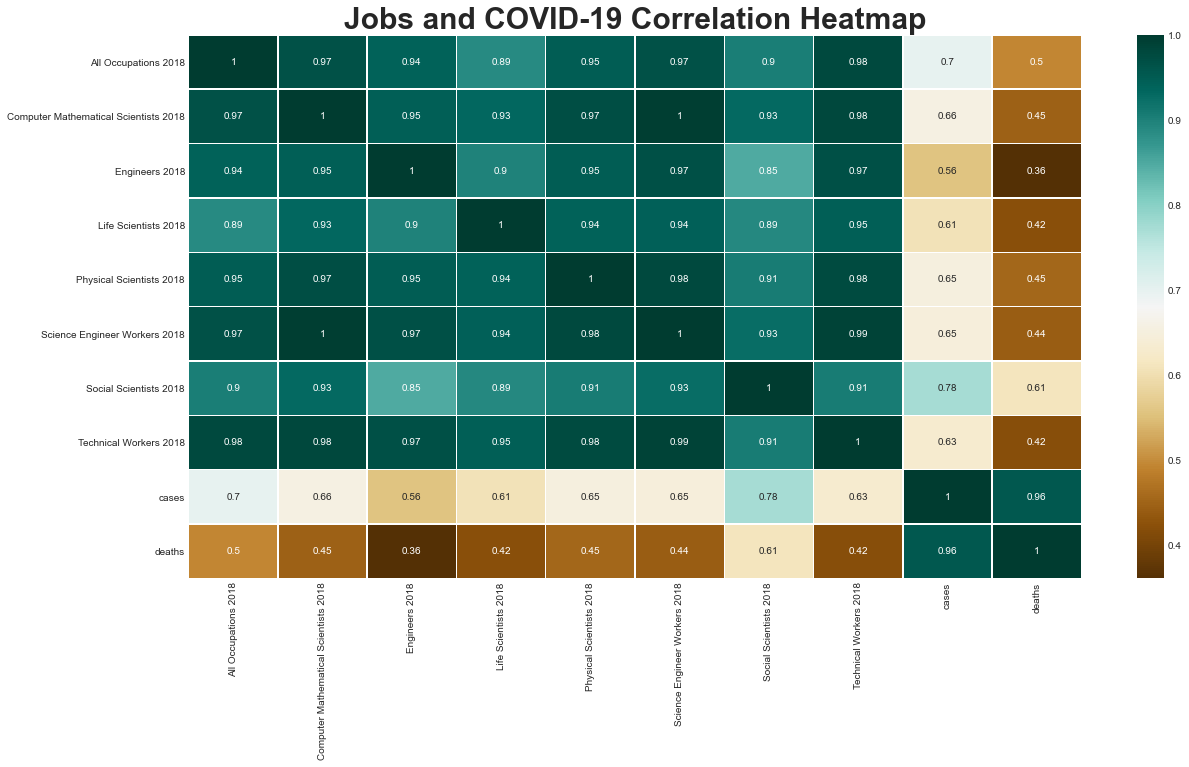

In [41]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Jobs and COVID-19 Correlation Heatmap', fontweight = 'bold', fontsize = 30);

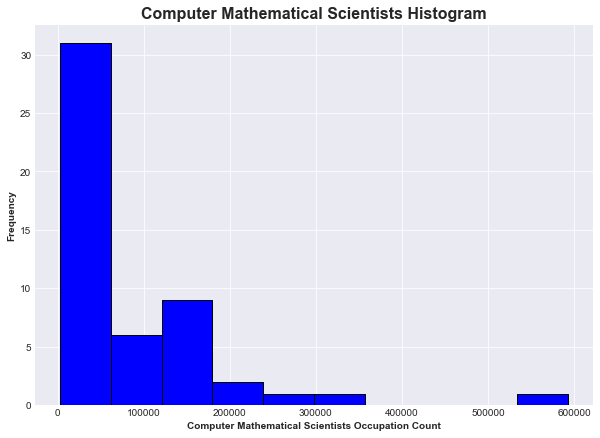

In [42]:
JobsDF['Computer Mathematical Scientists 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Computer Mathematical Scientists Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Computer Mathematical Scientists Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

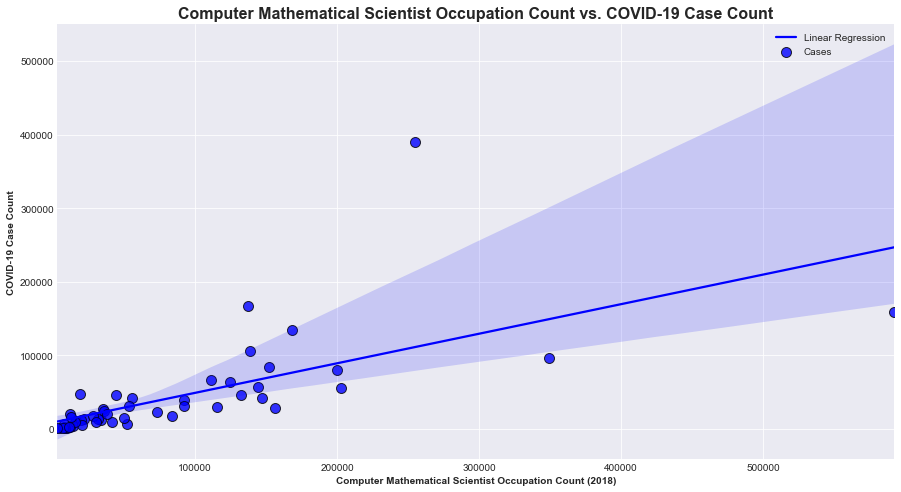

In [43]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Computer Mathematical Scientists 2018', y = 'cases', data = JobsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Computer Mathematical Scientist Occupation Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Computer Mathematical Scientist Occupation Count (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [44]:
spearmanr(JobsDF['cases'], JobsDF['Computer Mathematical Scientists 2018'])

SpearmanrResult(correlation=0.8797285067873303, pvalue=1.937047011685563e-17)

# OLS Regression

In [45]:
model2 = sm.OLS(JobsDF['cases'], JobsDF['Computer Mathematical Scientists 2018']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.600
Model:                            OLS   Adj. R-squared (uncentered):              0.592
Method:                 Least Squares   F-statistic:                              74.85
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    1.66e-11
Time:                        21:42:09   Log-Likelihood:                         -621.94
No. Observations:                  51   AIC:                                      1246.
Df Residuals:                      50   BIC:                                      1248.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Computer Mathematical Scientists 2018     0.4434      0.051      8.652      0.000       0.340       0.546
==============================================================================
Omnibus:                       70.810   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              857.841
Skew:                           3.540   Prob(JB):                    5.28e-187
Kurtosis:                      21.803   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

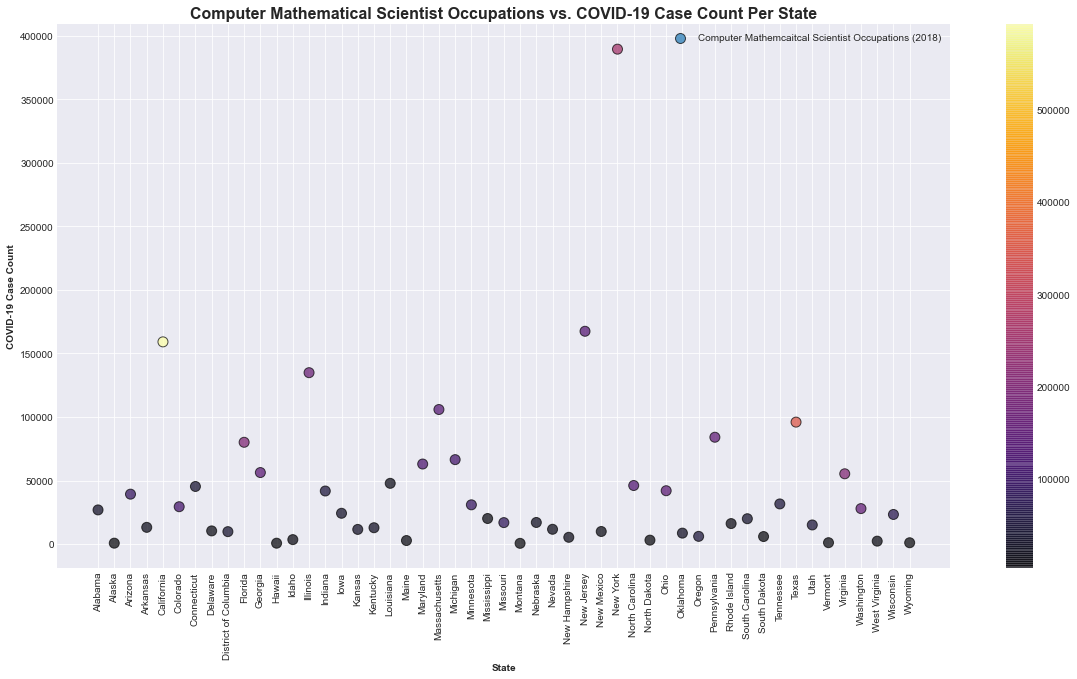

In [46]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = JobsDF['State'] 
y = JobsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = JobsDF['Computer Mathematical Scientists 2018'], cmap = 'inferno')
plt.title('Computer Mathematical Scientist Occupations vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Computer Mathemcaitcal Scientist Occupations (2018)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

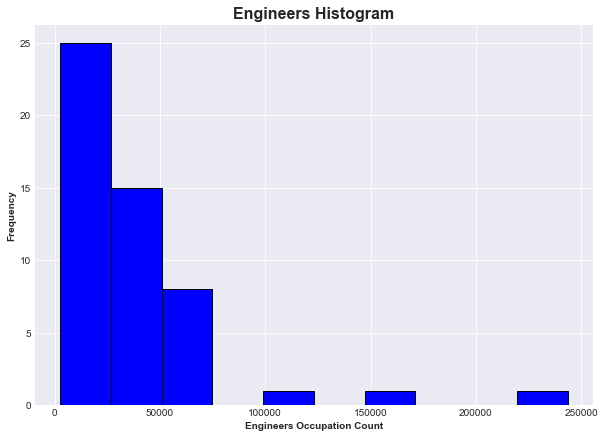

In [47]:
JobsDF['Engineers 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Engineers Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Engineers Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

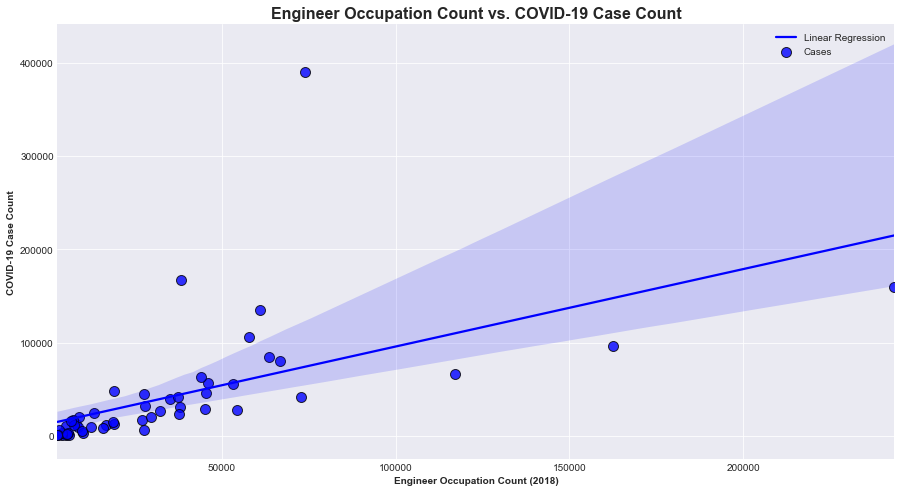

In [48]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Engineers 2018', y = 'cases', data = JobsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Engineer Occupation Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Engineer Occupation Count (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [49]:
spearmanr(JobsDF['cases'], JobsDF['Engineers 2018'])

SpearmanrResult(correlation=0.8940271493212669, pvalue=1.0336936794689319e-18)

# OLS Regression

In [50]:
model3 = sm.OLS(JobsDF['cases'], JobsDF['Engineers 2018']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                              51.38
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    3.28e-09
Time:                        21:42:10   Log-Likelihood:                         -627.25
No. Observations:                  51   AIC:                                      1256.
Df Residuals:                      50   BIC:                                      1258.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Engineers 2018     0.9788      0.137      7.168      0.000       0.705       1.253
==============================================================================
Omnibus:                       78.761   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1116.502
Skew:                           4.114   Prob(JB):                    3.59e-243
Kurtosis:                      24.394   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

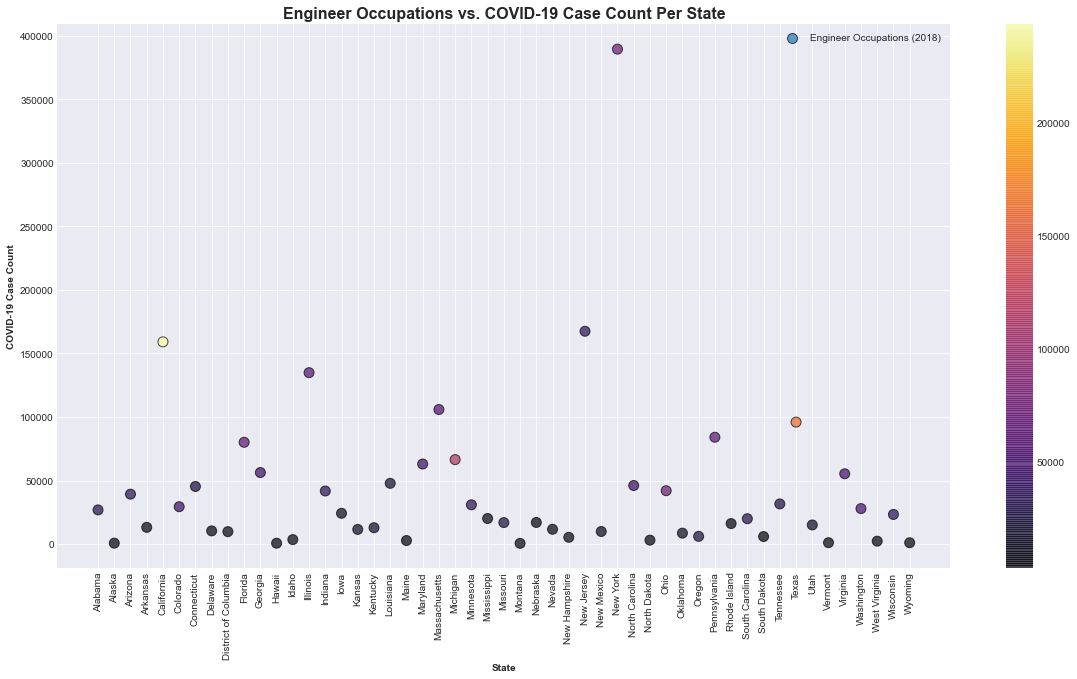

In [51]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = JobsDF['State'] 
y = JobsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = JobsDF['Engineers 2018'], cmap = 'inferno')
plt.title('Engineer Occupations vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Engineer Occupations (2018)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

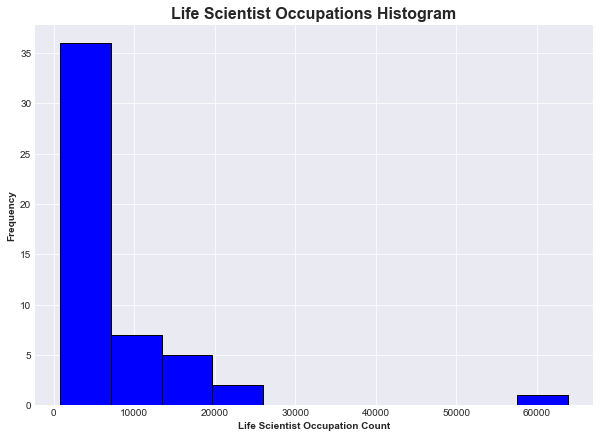

In [52]:
JobsDF['Life Scientists 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Life Scientist Occupations Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Life Scientist Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

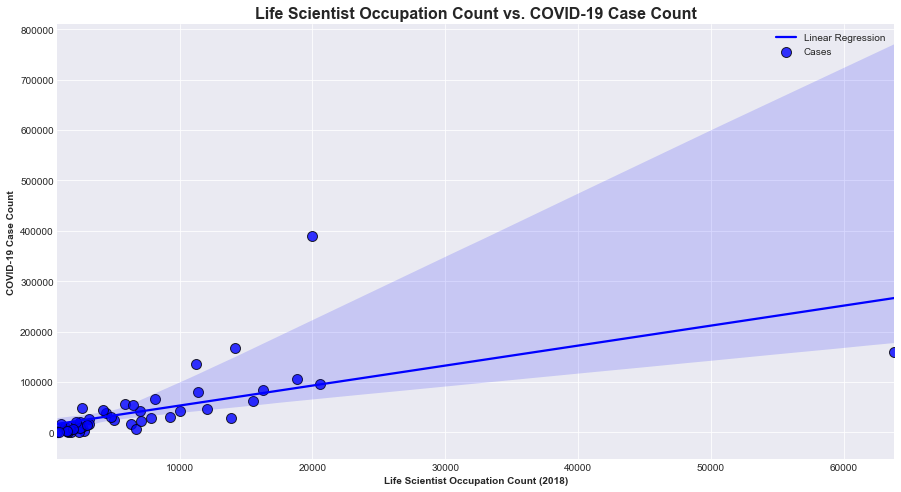

In [53]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Life Scientists 2018', y = 'cases', data = JobsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Life Scientist Occupation Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Life Scientist Occupation Count (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [54]:
spearmanr(JobsDF['cases'], JobsDF['Life Scientists 2018'])

SpearmanrResult(correlation=0.8489784838933923, pvalue=3.5381009572886423e-15)

# OLS Regression

In [55]:
model4 = sm.OLS(JobsDF['cases'], JobsDF['Life Scientists 2018']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.543
Model:                            OLS   Adj. R-squared (uncentered):              0.533
Method:                 Least Squares   F-statistic:                              59.30
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    4.84e-10
Time:                        21:42:11   Log-Likelihood:                         -625.33
No. Observations:                  51   AIC:                                      1253.
Df Residuals:                      50   BIC:                                      1255.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Life Scientists 2018     4.6462      0.603      7.701      0.000       3.434       5.858
==============================================================================
Omnibus:                       69.066   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.959
Skew:                           3.336   Prob(JB):                    5.67e-199
Kurtosis:                      22.624   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

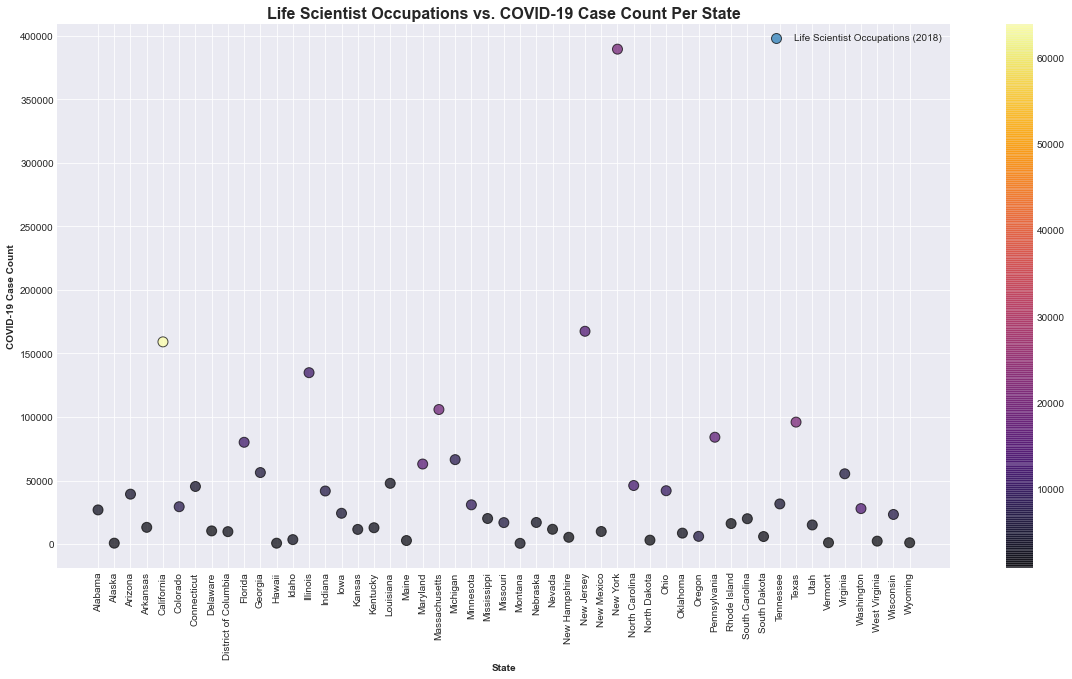

In [56]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = JobsDF['State'] 
y = JobsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = JobsDF['Life Scientists 2018'], cmap = 'inferno')
plt.title('Life Scientist Occupations vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Life Scientist Occupations (2018)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

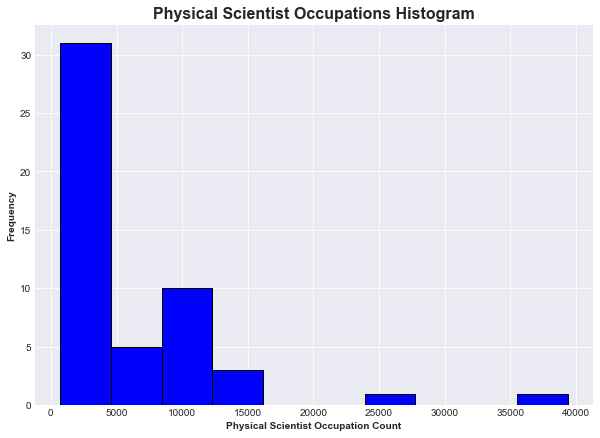

In [57]:
JobsDF['Physical Scientists 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Physical Scientist Occupations Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Physical Scientist Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

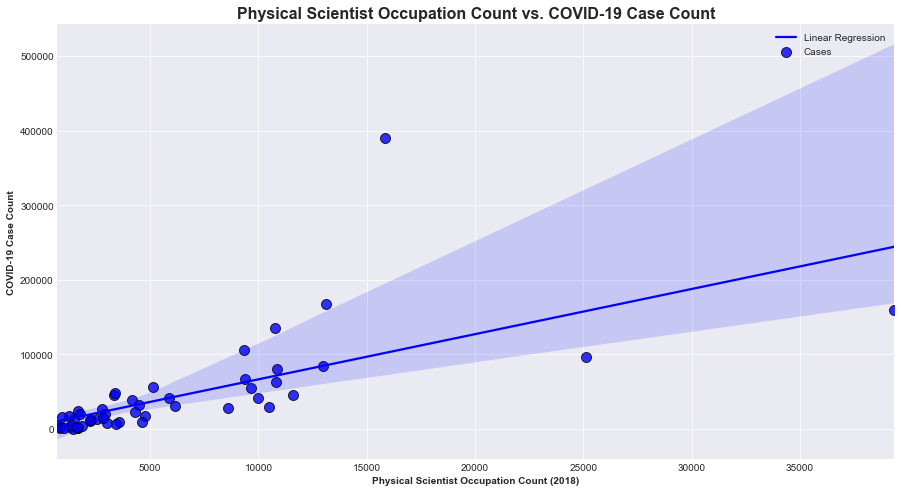

In [58]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Physical Scientists 2018', y = 'cases', data = JobsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Physical Scientist Occupation Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Physical Scientist Occupation Count (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [59]:
spearmanr(JobsDF['cases'], JobsDF['Physical Scientists 2018'])

SpearmanrResult(correlation=0.845675241737747, pvalue=5.775228288671747e-15)

# OLS Regression

In [60]:
model5 = sm.OLS(JobsDF['cases'], JobsDF['Physical Scientists 2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.599
Model:                            OLS   Adj. R-squared (uncentered):              0.591
Method:                 Least Squares   F-statistic:                              74.56
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    1.76e-11
Time:                        21:42:12   Log-Likelihood:                         -622.00
No. Observations:                  51   AIC:                                      1246.
Df Residuals:                      50   BIC:                                      1248.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Physical Scientists 2018     6.4944      0.752      8.635      0.000       4.984       8.005
==============================================================================
Omnibus:                       77.206   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.159
Skew:                           3.941   Prob(JB):                    3.54e-249
Kurtosis:                      24.824   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

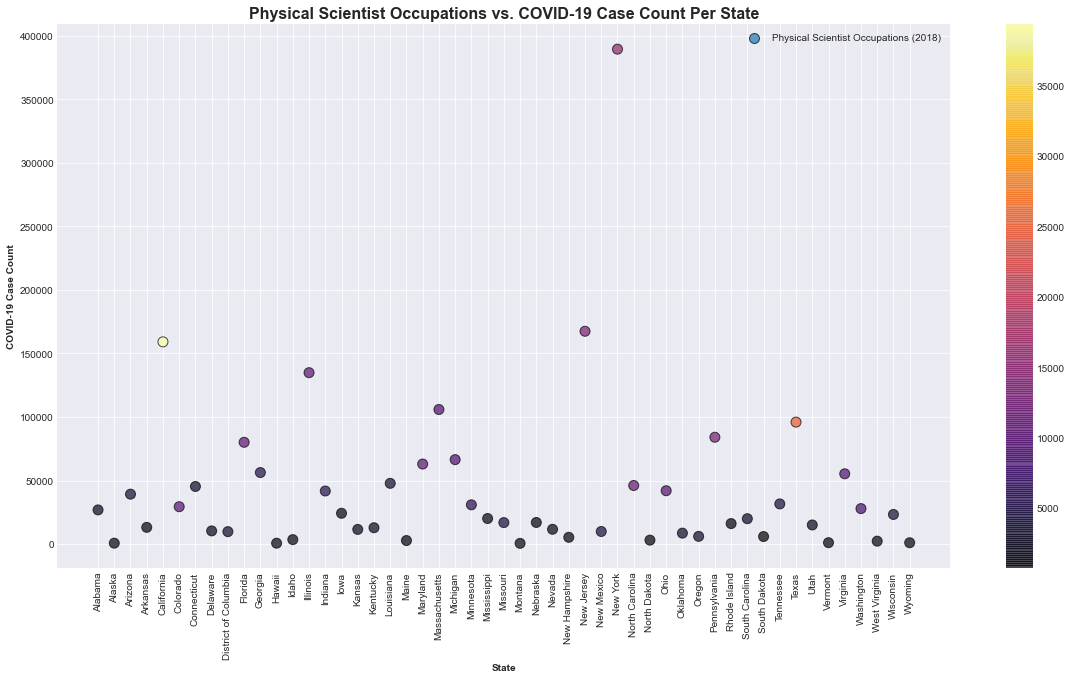

In [61]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = JobsDF['State'] 
y = JobsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = JobsDF['Physical Scientists 2018'], cmap = 'inferno')
plt.title('Physical Scientist Occupations vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Physical Scientist Occupations (2018)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

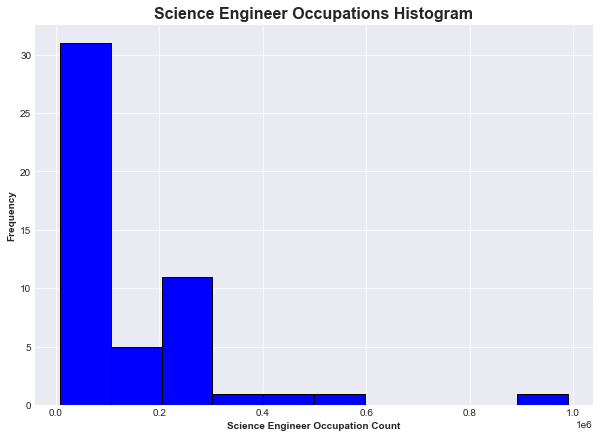

In [62]:
JobsDF['Science Engineer Workers 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Science Engineer Occupations Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Science Engineer Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

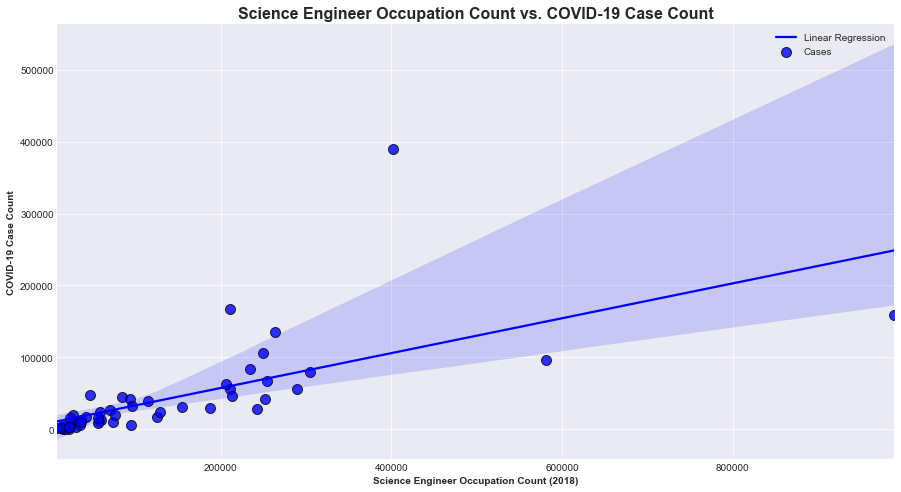

In [63]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Science Engineer Workers 2018', y = 'cases', data = JobsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Science Engineer Occupation Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Science Engineer Occupation Count (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [64]:
spearmanr(JobsDF['cases'], JobsDF['Science Engineer Workers 2018'])

SpearmanrResult(correlation=0.8895927601809954, pvalue=2.677186658079295e-18)

# OLS regression

In [65]:
model6 = sm.OLS(JobsDF['cases'], JobsDF['Science Engineer Workers 2018']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.590
Model:                            OLS   Adj. R-squared (uncentered):              0.582
Method:                 Least Squares   F-statistic:                              71.99
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    2.99e-11
Time:                        21:42:14   Log-Likelihood:                         -622.53
No. Observations:                  51   AIC:                                      1247.
Df Residuals:                      50   BIC:                                      1249.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Science Engineer Workers 2018     0.2683      0.032      8.485      0.000       0.205       0.332
==============================================================================
Omnibus:                       72.356   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.970
Skew:                           3.637   Prob(JB):                    4.63e-200
Kurtosis:                      22.470   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

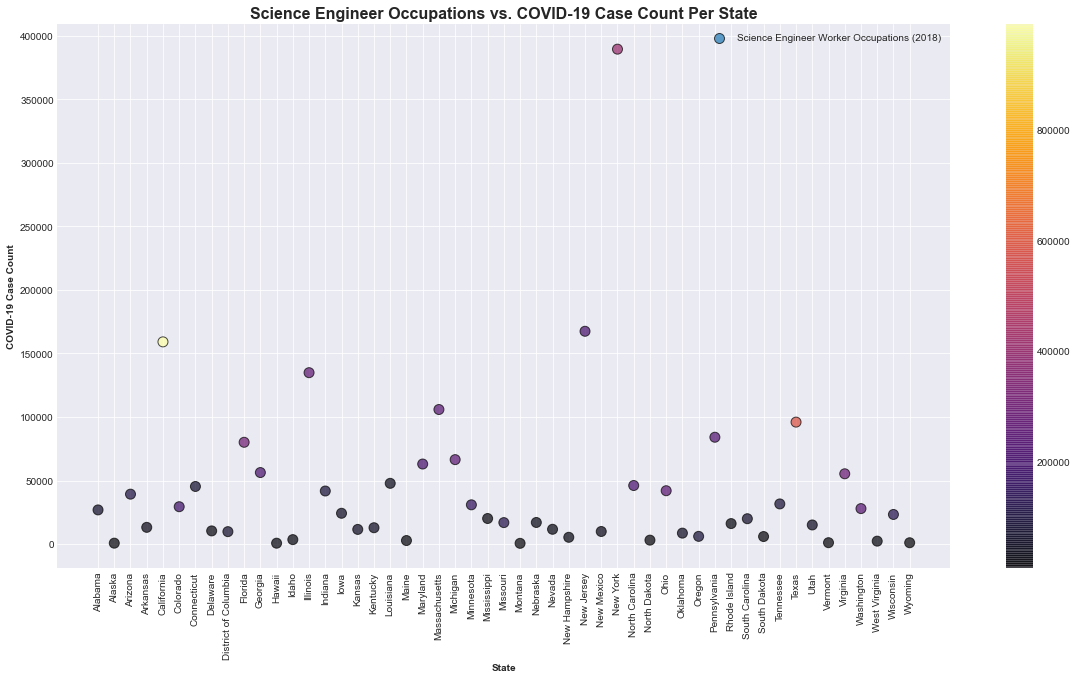

In [66]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = JobsDF['State'] 
y = JobsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = JobsDF['Science Engineer Workers 2018'], cmap = 'inferno')
plt.title('Science Engineer Occupations vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Science Engineer Worker Occupations (2018)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

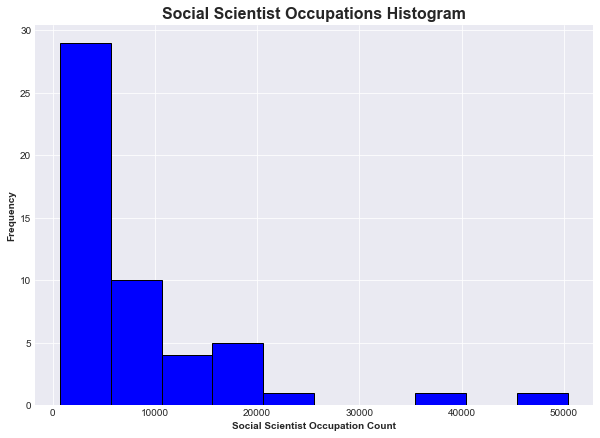

In [67]:
JobsDF['Social Scientists 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Social Scientist Occupations Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Social Scientist Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

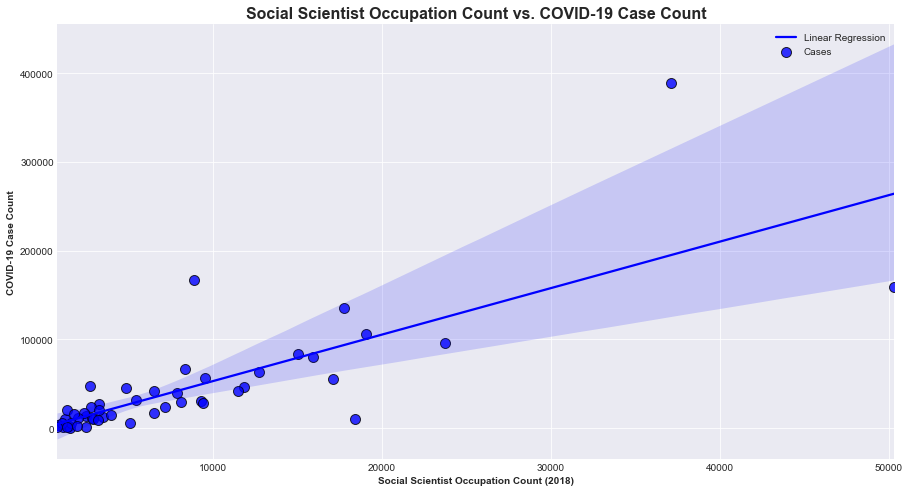

In [68]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Social Scientists 2018', y = 'cases', data = JobsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Social Scientist Occupation Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Social Scientist Occupation Count (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [69]:
spearmanr(JobsDF['cases'], JobsDF['Social Scientists 2018'])

SpearmanrResult(correlation=0.8239819004524886, pvalue=1.1115394821734243e-13)

# OLS Regression

In [70]:
model7 = sm.OLS(JobsDF['cases'], JobsDF['Social Scientists 2018']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.718
Method:                 Least Squares   F-statistic:                              131.0
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    1.41e-15
Time:                        21:42:15   Log-Likelihood:                         -612.46
No. Observations:                  51   AIC:                                      1227.
Df Residuals:                      50   BIC:                                      1229.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Social Scientists 2018     5.2778      0.461     11.447      0.000       4.352       6.204
==============================================================================
Omnibus:                       47.478   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.134
Skew:                           2.200   Prob(JB):                     5.51e-67
Kurtosis:                      14.146   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

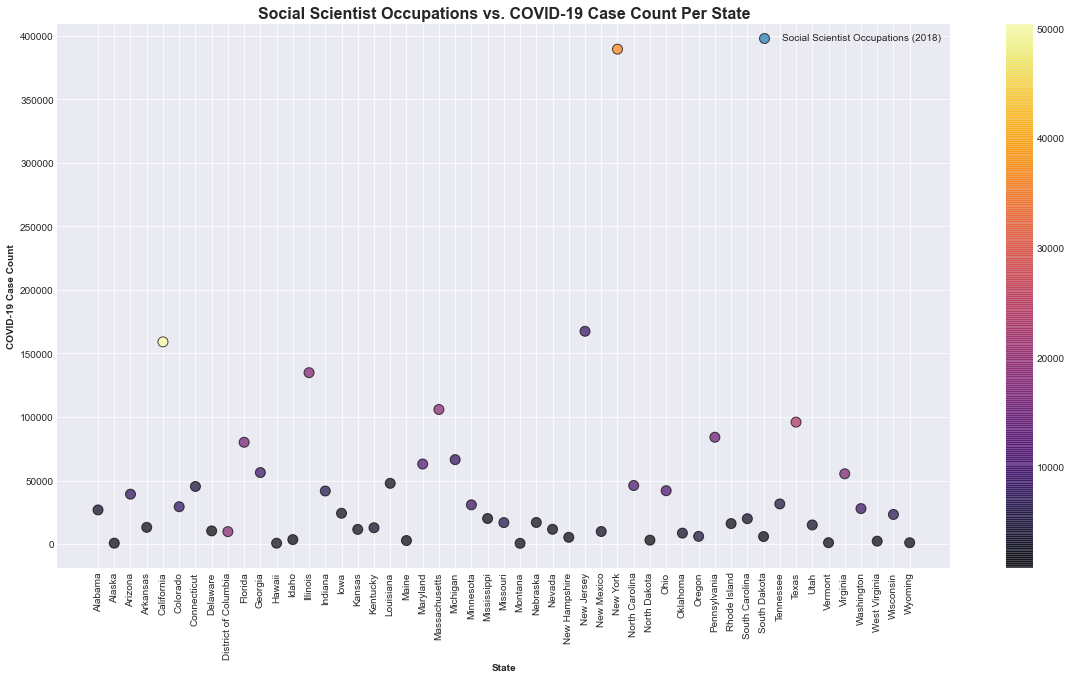

In [71]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = JobsDF['State'] 
y = JobsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = JobsDF['Social Scientists 2018'], cmap = 'inferno')
plt.title('Social Scientist Occupations vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Social Scientist Occupations (2018)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

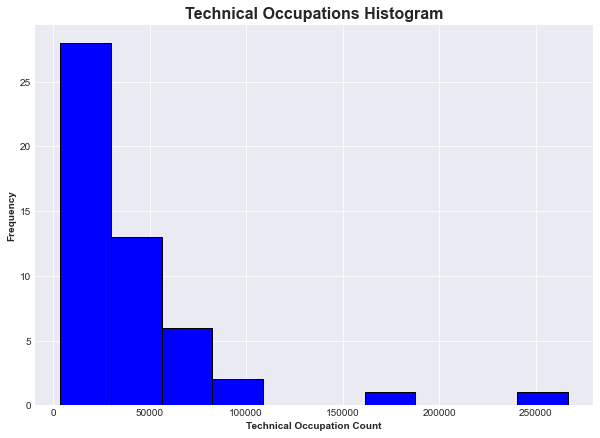

In [72]:
JobsDF['Technical Workers 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Technical Occupations Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Technical Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

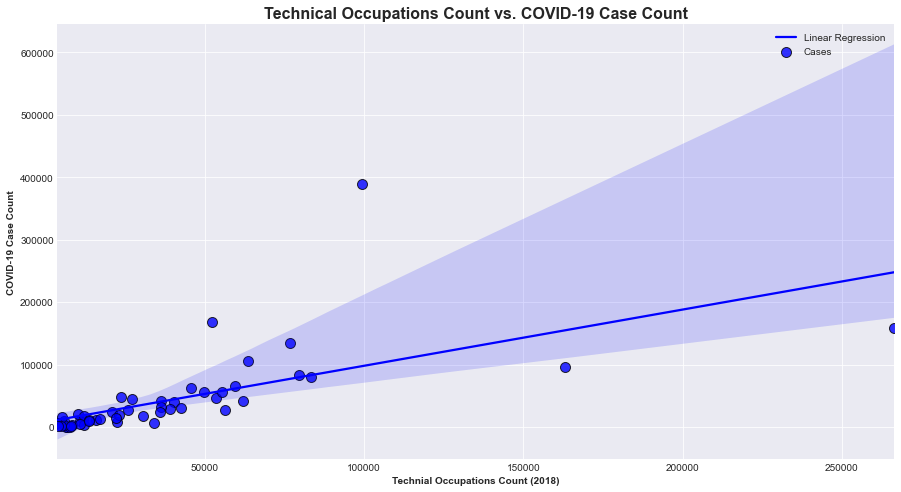

In [73]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Technical Workers 2018', y = 'cases', data = JobsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Technical Occupations Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Technial Occupations Count (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [74]:
spearmanr(JobsDF['cases'], JobsDF['Technical Workers 2018'])

SpearmanrResult(correlation=0.894841628959276, pvalue=8.639649446705254e-19)

# OLS Regression

In [75]:
model8 = sm.OLS(JobsDF['cases'], JobsDF['Technical Workers 2018']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.577
Model:                            OLS   Adj. R-squared (uncentered):              0.568
Method:                 Least Squares   F-statistic:                              68.19
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    6.66e-11
Time:                        21:42:16   Log-Likelihood:                         -623.34
No. Observations:                  51   AIC:                                      1249.
Df Residuals:                      50   BIC:                                      1251.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Technical Workers 2018     0.9907      0.120      8.258      0.000       0.750       1.232
==============================================================================
Omnibus:                       76.029   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1065.506
Skew:                           3.880   Prob(JB):                    4.25e-232
Kurtosis:                      24.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

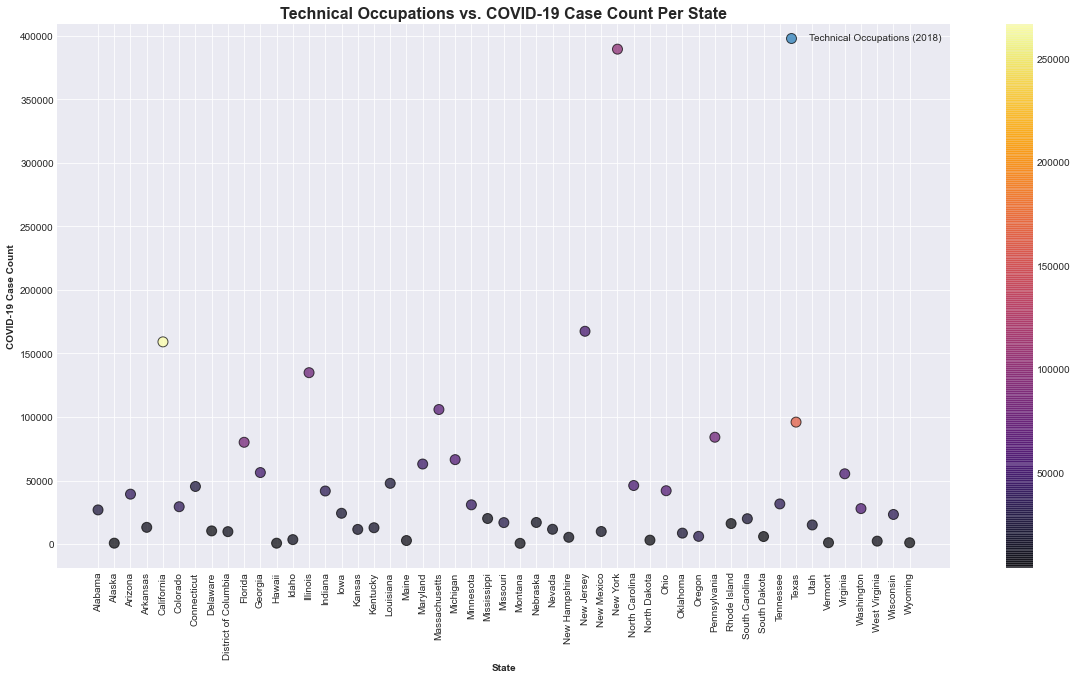

In [76]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = JobsDF['State'] 
y = JobsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = JobsDF['Technical Workers 2018'], cmap = 'inferno')
plt.title('Technical Occupations vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Technical Occupations (2018)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

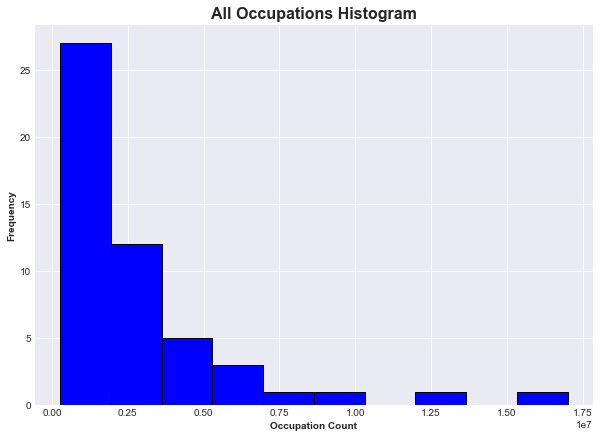

In [77]:
JobsDF['All Occupations 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('All Occupations Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

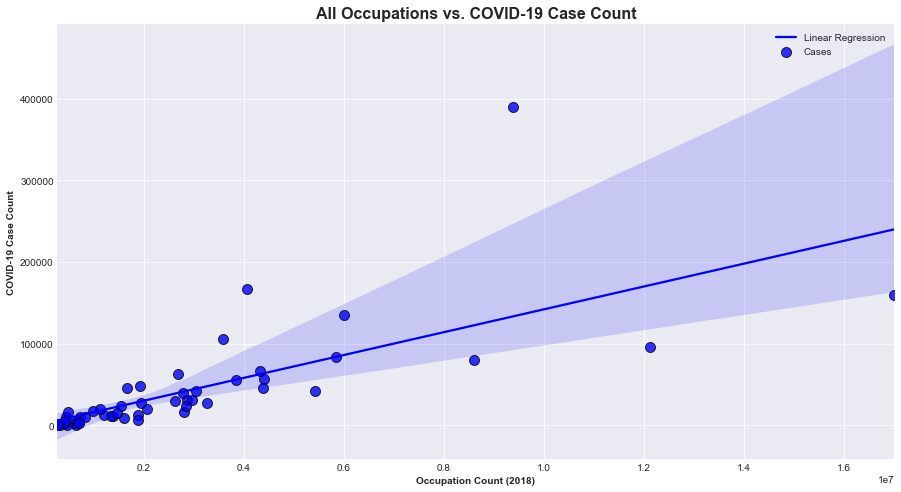

In [78]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'All Occupations 2018', y = 'cases', data = JobsDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('All Occupations vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spearman Correlation

In [79]:
spearmanr(JobsDF['cases'], JobsDF['All Occupations 2018'])

SpearmanrResult(correlation=0.9081447963800905, pvalue=3.6787387564198e-20)

# OLS Regression

In [80]:
model1 = sm.OLS(JobsDF['cases'], JobsDF['All Occupations 2018']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              90.89
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    7.82e-13
Time:                        21:42:17   Log-Likelihood:                         -618.86
No. Observations:                  51   AIC:                                      1240.
Df Residuals:                      50   BIC:                                      1242.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
All Occupations 2018     0.0143      0.002      9.534      0.000       0.011       0.017
==============================================================================
Omnibus:                       70.111   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.864
Skew:                           3.540   Prob(JB):                    3.71e-171
Kurtosis:                      20.867   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

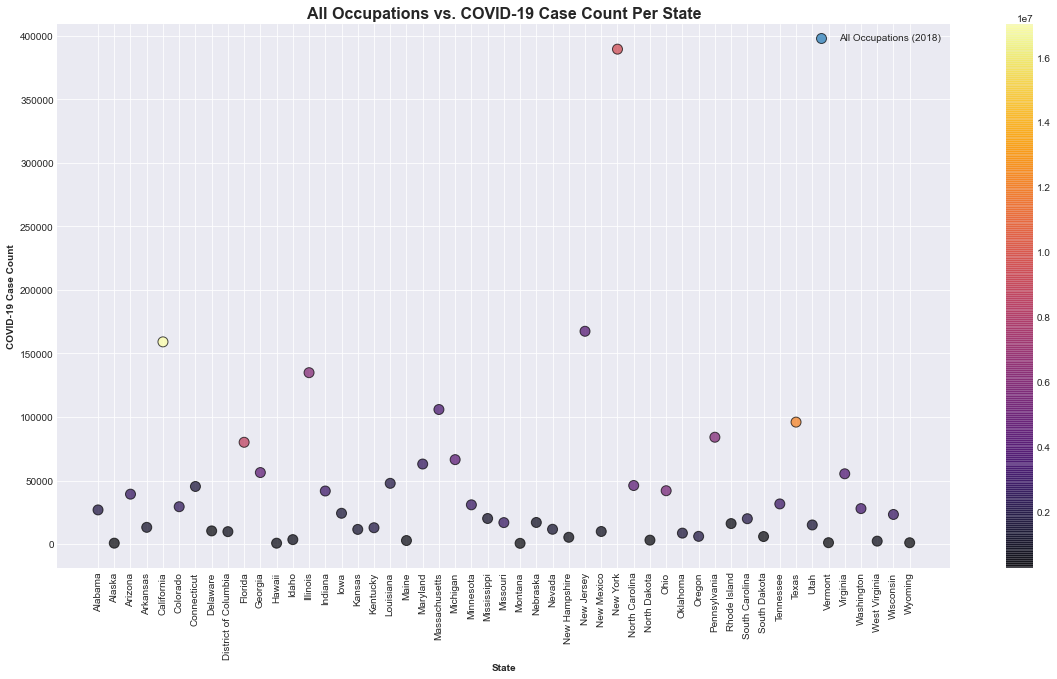

In [81]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = JobsDF['State'] 
y = JobsDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = JobsDF['All Occupations 2018'], cmap = 'inferno')
plt.title('All Occupations vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['All Occupations (2018)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [82]:
model9 = sm.OLS(JobsDF['cases'], JobsDF[['All Occupations 2018', 'Computer Mathematical Scientists 2018', 
                                        'Engineers 2018', 'Life Scientists 2018', 'Physical Scientists 2018',
                                        'Science Engineer Workers 2018', 'Social Scientists 2018',
                                        'Technical Workers 2018']]).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              25.66
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    5.35e-14
Time:                        21:42:18   Log-Likelihood:                         -600.57
No. Observations:                  51   AIC:                                      1217.
Df Residuals:                      43   BIC:                                      1233.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
All Occupations 2018                      0.0376      0.010      3.875      0.000       0.018       0.057
Computer Mathematical Scientists 2018    -0.0969      0.835     -0.116      0.908      -1.781       1.587
Engineers 2018                            0.0071      0.964      0.007      0.994      -1.938       1.952
Life Scientists 2018                      2.9486      2.452      1.203      0.236      -1.996       7.894
Physical Scientists 2018                  4.2636      3.558      1.198      0.237      -2.912      11.439
Science Engineer Workers 2018            -0.1693      0.729     -0.232      0.818      -1.640       1.301
Social Scientists 2018                    6.2806      1.669      3.762      0.001       2.914       9.647
Technical Workers 2018                   -3.3735      1.356     -2.487      0.017      -6.109      -0.638
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               31.892
Skew:                           0.437   Prob(JB):                     1.19e-07
Kurtosis:                       6.774   Cond. No.                     3.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""